###

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

4.) What was the correlation between different stocks' daily returns?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior?

In [1]:
import pandas as pd 
from pandas import Series, DataFrame
import numpy as np


In [2]:
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [3]:
from pandas_datareader import data

In [4]:
from datetime import datetime

In [5]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [6]:
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [7]:
for stock in tech_list:
    globals()[stock]=data.DataReader(stock,'yahoo', start,end)

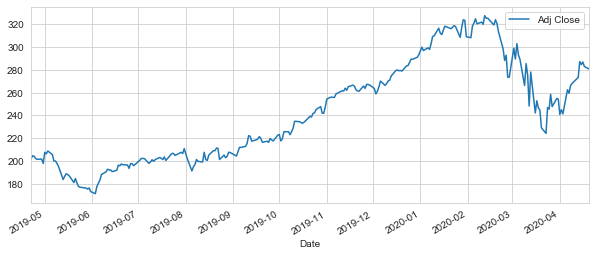

In [8]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

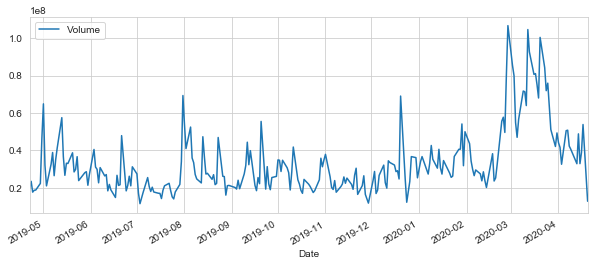

In [12]:
# plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [13]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-22,204.940002,202.339996,202.830002,204.529999,19439500.0,201.887497
2019-04-23,207.750000,203.899994,204.429993,207.479996,23323000.0,204.799362
2019-04-24,208.479996,207.050003,207.360001,207.160004,17540600.0,204.483505
2019-04-25,207.759995,205.119995,206.830002,205.279999,18543200.0,202.627808
2019-04-26,205.000000,202.119995,204.899994,204.300003,18649100.0,201.660461


NameError: name 'short_rolling_msft' is not defined

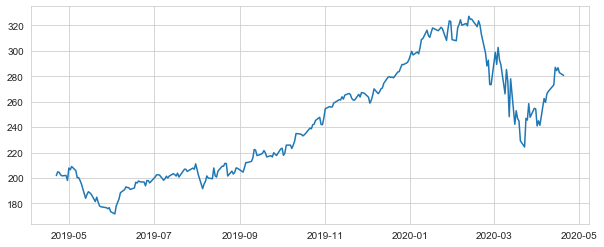

In [14]:
#moving averages 
appl=AAPL['Adj Close'].loc[:,]
# Calculate the 20,50 and 100 days moving averages of the closing prices
short_rolling_appl = appl.rolling(window=10).mean()
mid_rolling_appl = appl.rolling(window=20).mean()
long_rolling_appl = appl.rolling(window=30).mean()

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(appl.index, appl, label='Adjusted closing')
ax.plot(short_rolling_msft.index, short_rolling_appl, label='10 days rolling')
ax.plot(mid_rolling_appl.index, mid_rolling_appl, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_, label='50 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

## Section 2 - Daily Return Analysis

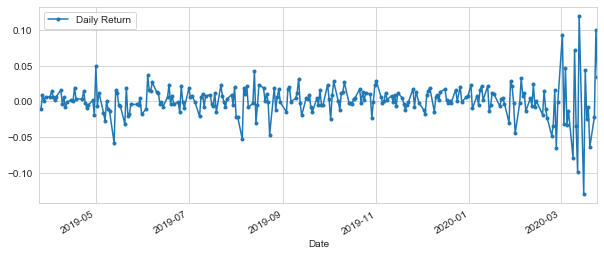

In [101]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change() #percent change on the adj closing 

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,style='.-')


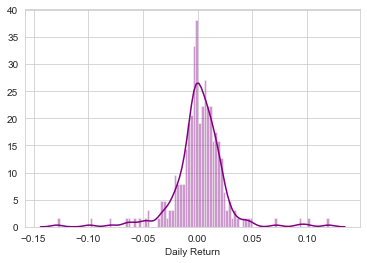

In [106]:
#average daily return using a histogram.

sns.distplot(AAPL['Daily Return'].dropna(), bins=100,color='purple')

In [109]:
#create a dataframe from using the closing price of each of the tech stock
closing_df=data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [110]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-03-25,186.301483,1774.260010,1193.000000,116.123627
2019-03-26,184.376678,1783.760010,1184.619995,116.370346
2019-03-27,186.034973,1765.699951,1173.020020,115.245224
2019-03-28,186.281738,1773.420044,1168.489990,115.403145
2019-03-29,187.495865,1780.750000,1173.310059,116.399963


In [111]:
tech_rets=closing_df.pct_change() #percent on each closing price

/Users/jehoiadajackson/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


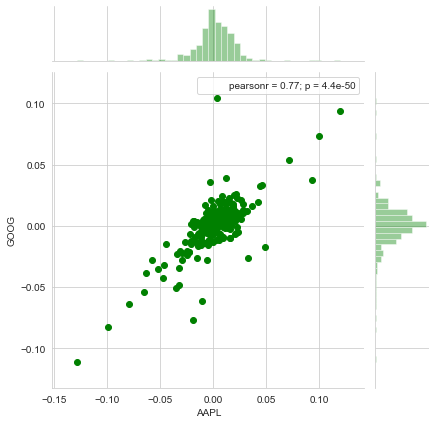

In [204]:
#compare GOOG to AAPL
sns.jointplot(x='AAPL',y='GOOG', data=tech_rets,color='green',kind='scatter').annotate(stats.pearsonr)

/Users/jehoiadajackson/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


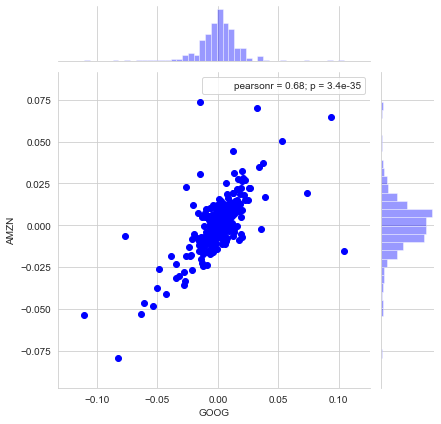

In [123]:
#compare MSFT to AAPL
sns.jointplot(x='AAPL',y='MSFT', data=tech_rets,color='blue',kind='scatter').annotate(stats.pearsonr)

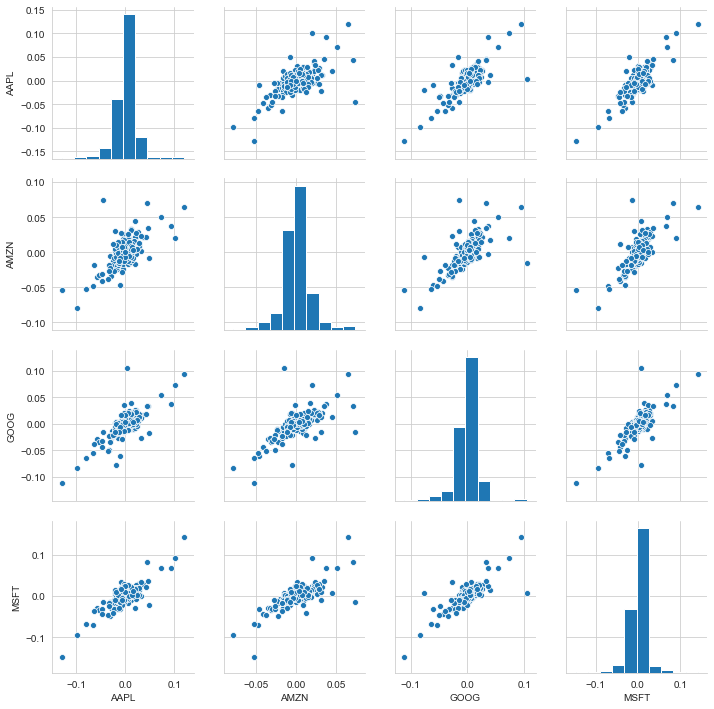

In [210]:
#Pairplot used for comparing all info

sns.pairplot(tech_rets.dropna());

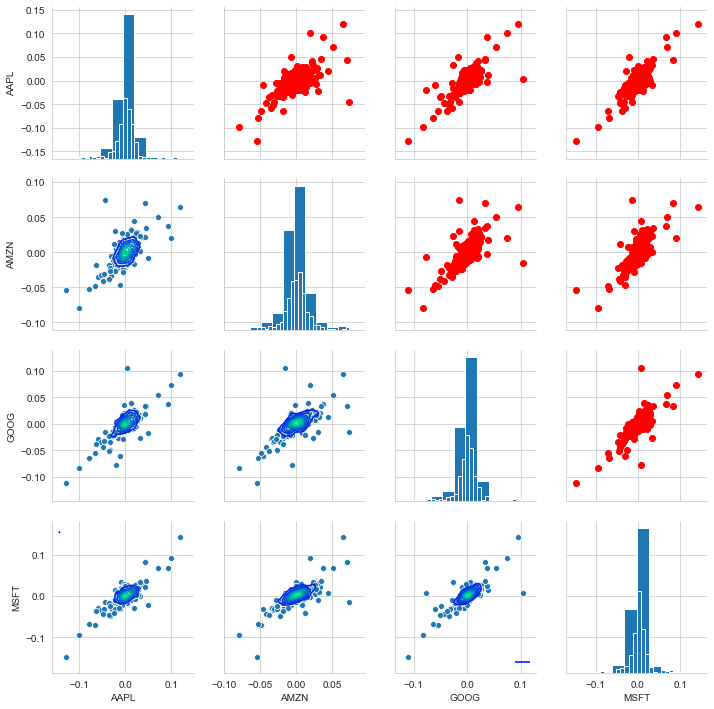

In [209]:
#correlation between AAPL, MSFT, GOOG, AMZN
new_plot=sns.pairplot(tech_rets.dropna())

new_plot.map_upper(plt.scatter, color='red')
new_plot.map_lower(sns.kdeplot,cmap='winter')
new_plot.map_diag(plt.hist,bins=30);


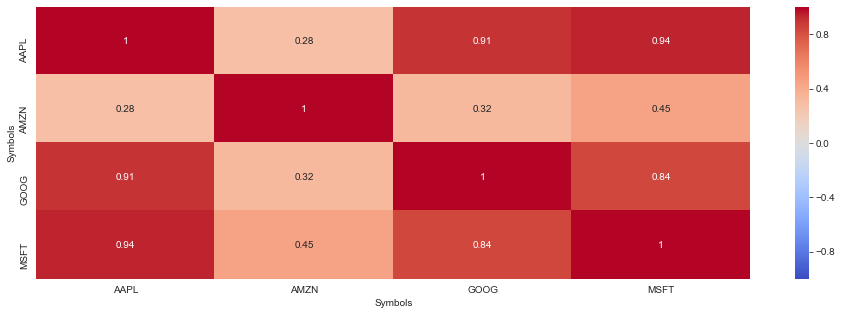

In [208]:
#correlation plot for the daily returns
plt.figure(figsize = (16,5))
sns.heatmap(closing_df.dropna().corr(),annot=True,cmap='coolwarm',vmin=-1);


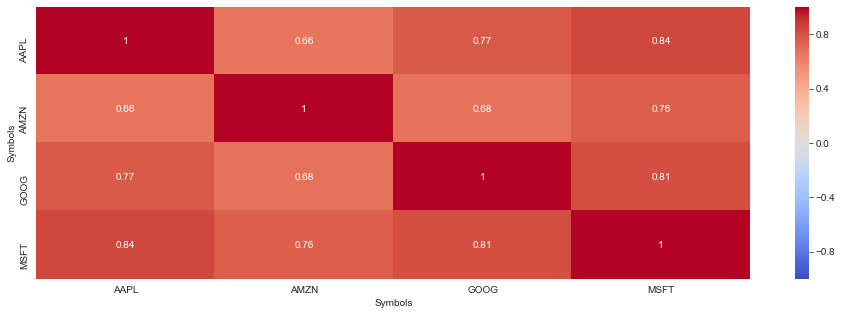

In [207]:
plt.figure(figsize = (16,5))
sns.heatmap(tech_rets.dropna().corr(),annot=True,cmap='coolwarm',vmin=-1);


### Risk Analysis

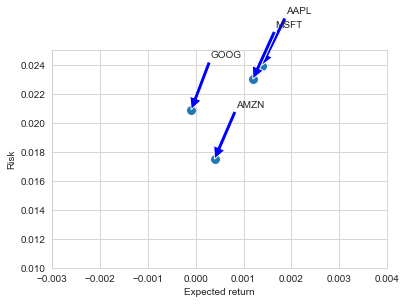

In [201]:
#comapring expected returns with std of the returns.
rets=tech_rets.dropna()
area=np.pi*20
plt.scatter(rets.mean(),rets.std(), s=area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected return')
plt.ylabel('Risk')

for label,x, y in zip(rets.columns, rets.mean(),rets.std()):
    plt.annotate(label,
                xy=(x,y),xytext=(50,50),
                textcoords='offset points', ha ='right', va='bottom',
                arrowprops=dict(facecolor='blue'))
    

### Value at risk using the "bootstrap" method

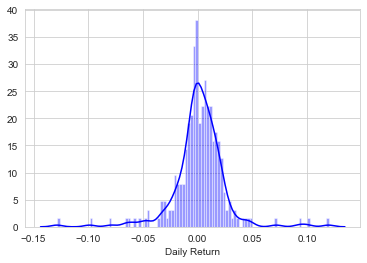

In [206]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='blue');

In [211]:
rets['AAPL'].quantile(0.05)

-0.03203036737004463


The 0.05 empirical quantile of daily returns is at -0.032. That means that with 95% confidence, our worst daily loss will not exceed 3.2%. 
If we have a 1 million dollar investment, our one-day 5% VaR is 0.032 * 1,000,000 = $32,000.

#### Monte Carlo 

In [215]:
#set up time horizon
days= 365

#delta
dt=1/days

#mu (drift) from the expected return data we got for AAPL
mu=rets['GOOG'].mean()

#volatility of the stock from the std() of the average return
sigma=rets['GOOG'].std()

0.020913435775209658

In [250]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Shock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price


Text(0.5, 1.0, 'Monte Carlo Analysis for google')

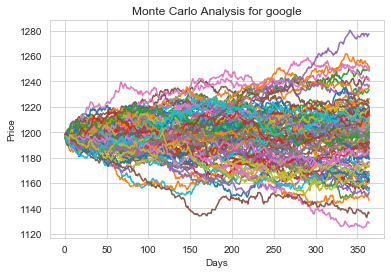

In [251]:
start_price= 1196.93

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for google')

In [261]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


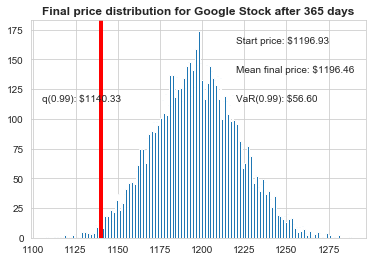

In [262]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

